In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn2


In [2]:
# Import dataframes
DIMSpy_df = pd.read_csv("DIMSpy_SNR3.5_ppm555_NC_BC_Clustered_Feature_Matrix.csv", index_col = 0)
MALDIquant_df = pd.read_csv("MALDIquant_Tol5e-6_keep400_C_Filtered_BC_Clustered_Feature_Matrix.csv",index_col = 0)
MZmine_df = pd.read_csv("MZmine_MinF7.5E3_NT3.5_Tol555_NC_BC_Clustered_Feature_Matrix.csv",index_col = 0)

In [3]:
DIMSpy_mz = set(DIMSpy_df.index.tolist())
MALDIquant_mz = set(MALDIquant_df.index.tolist())
MZmine_mz = set(MZmine_df.index.tolist())


print(len(DIMSpy_mz))
print(len(MALDIquant_mz))
print(len(MZmine_mz))

553
364
1411


In [4]:
def ppm_diff(x, y):
  return abs((x - y) / x) * 1e6

def find_matches_dict(list1, list2, tolerance_ppm):

  matches = {}
  list1_without_matches = []
  list2_without_matches = set(list2)  # Using a set for faster lookups

  for x in list1:
    closest_match = None
    min_diff = float('inf')
    for y in list2:
      diff = ppm_diff(x, y)
      if diff <= tolerance_ppm and diff < min_diff:
        closest_match = y
        min_diff = diff
    if closest_match:
      matches[x] = closest_match
    else:
      list1_without_matches.append(x)

  list2_without_matches = list(list2_without_matches - set(matches.values()))

  return list1_without_matches, matches, list2_without_matches


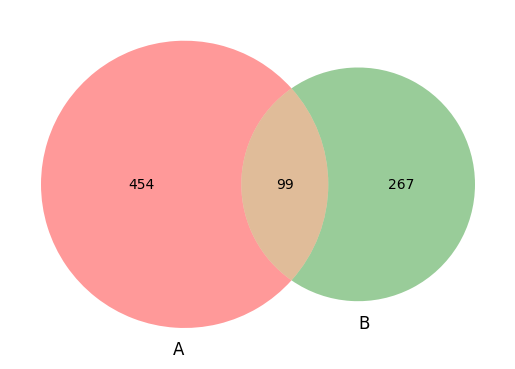

In [5]:
DIMSpy_no_MALDIquant, DIMSpy_MALDIquant, MALDIquant_no_DIMSpy = find_matches_dict(DIMSpy_mz,MALDIquant_mz,tolerance_ppm=5)
venn2(subsets=(len(DIMSpy_no_MALDIquant),len(MALDIquant_no_DIMSpy),len(DIMSpy_MALDIquant)))

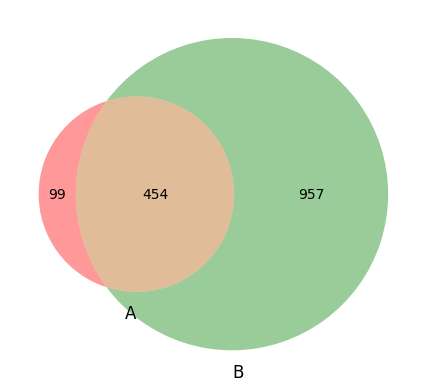

In [6]:
just_DIMSpy, DIMSpy_MZmine, MZmine_no_DIMSpy = find_matches_dict(DIMSpy_mz,MZmine_mz,tolerance_ppm=5)
venn2(subsets=(len(just_DIMSpy),len(MZmine_no_DIMSpy),len(DIMSpy_MZmine)))

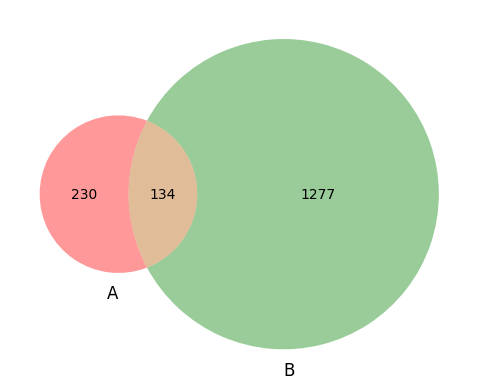

In [7]:
just_MZmine, MZmine_MALDIquant, just_MALDIquant = find_matches_dict(MALDIquant_mz,MZmine_mz,tolerance_ppm=5)
venn2(subsets=(len(just_MZmine),len(just_MALDIquant),len(MZmine_MALDIquant)))

In [8]:
def find_closest_matches_three_lists(list1, list2, list3, tolerance_ppm):
    """Finds closest matches among three lists with a given ppm tolerance.

    Args:
        list1: The first list of numbers.
        list2: The second list of numbers.
        list3: The third list of numbers.
        tolerance_ppm: The allowed ppm difference between values.

    Returns:
        A tuple containing:
            - Dictionary of closest matches: {element from list1: (closest match from list2, closest match from list3)}
            - List of elements from list1 without matches
            - List of elements from list2 without matches
            - List of elements from list3 without matches
    """

    matches = {}
    list1_without_matches = []
    list2_without_matches = set(list2)
    list3_without_matches = set(list3)

    for x in list1:
        closest_match2 = None
        closest_match3 = None
        min_diff2 = float('inf')
        min_diff3 = float('inf')

        for y in list2:
            diff = ppm_diff(x, y)
            if diff <= tolerance_ppm and diff < min_diff2:
                closest_match2 = y
                min_diff2 = diff

        for z in list3:
            diff = ppm_diff(x, z)
            if diff <= tolerance_ppm and diff < min_diff3:
                closest_match3 = z
                min_diff3 = diff

        if closest_match2 and closest_match3:
            matches[x] = (closest_match2, closest_match3)
        else:
            list1_without_matches.append(x)

    # Update list2_without_matches and list3_without_matches
    list2_without_matches = list(list2_without_matches - set(match[0] for match in matches.values() if match[0]))
    list3_without_matches = list(list3_without_matches - set(match[1] for match in matches.values() if match[1]))

    return matches, list1_without_matches, list2_without_matches, list3_without_matches

all_three, DIMSpy_no3, MALDIquant_no3, MZMine_no3 =find_closest_matches_three_lists(DIMSpy_mz,MALDIquant_mz,MZmine_mz,5)


In [9]:
all_three, DIMSpy_MALDIquant_done, DIMSpy_MZmine_done, MALDIquant_MZmine_done =find_closest_matches_three_lists(DIMSpy_mz,MALDIquant_mz,MZmine_mz,5)


In [10]:
print("Length of all_three:", len(all_three))
print("Length of DIMSpy_MALDIquant_done:", len(DIMSpy_MALDIquant_done))
print("Length of DIMSpy_MZmine_done:", len(DIMSpy_MZmine_done))
print("Length of MALDIquant_MZmine_done:", len(MALDIquant_MZmine_done))
print("Length of just_DIMSpy:", len(just_DIMSpy))
print("Length of just_MZmine:", len(just_MZmine))
print("Length of just_MALDIquant:", len(just_MALDIquant))

Length of all_three: 82
Length of DIMSpy_MALDIquant_done: 471
Length of DIMSpy_MZmine_done: 284
Length of MALDIquant_MZmine_done: 1329
Length of just_DIMSpy: 99
Length of just_MZmine: 230
Length of just_MALDIquant: 1277


In [11]:
print(DIMSpy_MALDIquant_done)

[409.183199836749, 416.140996931878, 70.0339711222804, 74.0018358637769, 90.0549354995816, 97.0049651056708, 98.9954162333779, 101.774786414371, 101.776060254942, 101.795398297243, 101.800885260054, 101.777844532625, 101.786182323538, 101.788760909907, 101.789676031991, 101.793408061372, 101.059704035408, 102.091338861539, 104.106990325585, 106.049869296135, 110.071275378762, 112.03689838742, 112.052211072324, 119.089627180906, 123.013864951654, 128.994683727115, 131.018731752835, 132.076962475183, 132.102134659903, 134.080746853902, 132.080502078378, 132.101047338094, 133.034384468499, 133.073819648843, 133.079197986906, 133.080338004916, 133.105292026439, 134.044775171322, 135.002849671854, 137.029353673106, 148.07350355951, 141.015085958193, 141.015873672183, 142.026421379927, 143.010541250704, 144.005798233011, 145.026203292982, 147.074791138377, 148.07899094734, 149.007283707062, 150.058376667511, 151.047847893032, 152.021256453346, 156.076765100213, 163.977817406186, 157.01075180

In [12]:
print(MALDIquant_MZmine_done)

[73.53784, 74.02987, 73.05882, 74.03026, 76.86789, 101.7728, 90.05493, 97.00502, 98.99515, 98.99552, 101.76615, 101.79945, 101.77648, 104.10699, 105.00327, 101.75289, 101.77081, 101.77531, 106.95059, 106.04987, 110.07128, 112.03691, 113.00837, 112.08693, 114.05043, 119.01895, 116.97711, 122.92454, 123.01386, 118.08627, 116.07062, 123.05531, 128.99488, 130.04922, 131.00981, 132.0729, 132.07462, 132.0767, 135.08046, 132.10081, 137.05732, 132.08005, 133.0731, 135.00231, 136.06105, 137.02951, 138.03159, 139.07299, 140.06724, 140.9949, 139.01562, 143.01041, 143.04853, 145.03442, 145.03463, 147.11286, 148.05966, 148.0735, 150.97599, 156.07676, 149.02953, 150.05837, 152.02135, 151.04785, 156.0424, 154.0579, 154.05871, 156.04055, 156.04124, 158.04027, 159.01386, 162.07609, 162.11238, 170.03133, 169.05741, 170.03166, 167.03149, 172.03077, 170.04239, 179.98228, 179.12848, 177.13464, 178.97173, 184.09445, 177.06082, 187.12594, 185.03234, 189.15979, 189.0524, 191.04011, 192.15943, 192.02433, 194.9

In [13]:
len(MZmine_mz)

1411

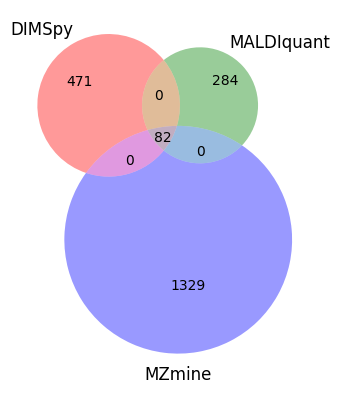

In [14]:
all_three, DIMSpy_no3,MALDIquant_no3,MZMine_no3 =find_closest_matches_three_lists(DIMSpy_mz,MALDIquant_mz,MZmine_mz,5)

venn3(subsets = (len(DIMSpy_no3),len(MALDIquant_no3),0,len(MZMine_no3),0,0,len(all_three)),set_labels = ('DIMSpy', 'MALDIquant', 'MZmine'))

In [15]:
DIMSpy_only , AnB, MALDIquant = find_matches_dict(DIMSpy_no3,MALDIquant_no3,5)
A , AnC, MZmine = find_matches_dict(DIMSpy_only,MZmine_mz,5)
B, BnC, C = find_matches_dict(MALDIquant, MZmine,5)

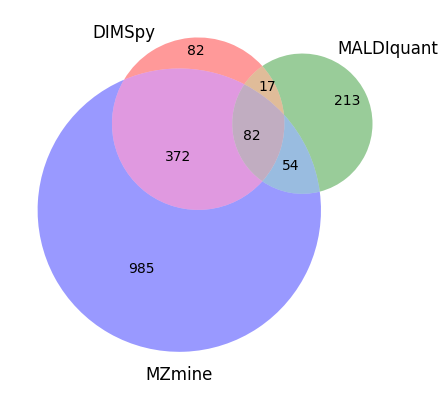

In [16]:
figure = venn3(subsets = (len(A), len(B),len(AnB),len(C),
                 len(AnC), 
                 len(BnC),len(all_three)), set_labels = ('DIMSpy', 'MALDIquant', 'MZmine'))


# Finding the number of significant features 

In [17]:
DIMSpy_p_vals = pd.read_csv("DIMSpy_benjamini_p_values.csv")
DIMSpy_p_vals = DIMSpy_p_vals[DIMSpy_p_vals["C vs S"] < 0.05]
DIMSpy_significant = DIMSpy_p_vals.iloc[:,0].to_list()

In [18]:
MALDIquant_p_vals = pd.read_csv("MALDIquant_benjamini_p_values.csv")
MALDIquant_p_vals = MALDIquant_p_vals[MALDIquant_p_vals["C vs S"] < 0.05]
MALDIquant_significant = MALDIquant_p_vals.iloc[:,0].to_list()

In [19]:
MZmine_p_vals = pd.read_csv("MZmine_benjamini_p_values.csv")
MZmine_p_vals = MZmine_p_vals[MZmine_p_vals["C vs S"] < 0.05]
MZmine_significant = MZmine_p_vals.iloc[:,0].to_list()

In [20]:
temp, alpha , temp2 = find_matches_dict(A,DIMSpy_significant,5)

print("Significant", len(alpha))
print("Not significant",len(temp))

Significant 41
Not significant 41


In [21]:
temp, beta, temp2 = find_matches_dict(B,MALDIquant_significant,5)

print("Significant", len(beta))
print("Not significant",len(temp))

Significant 48
Not significant 165


In [22]:
temp, gamma , temp2 = find_matches_dict(C,MZmine_significant,5)

print("Significant", len(gamma))
print("Not significant",len(temp))

Significant 509
Not significant 476


In [23]:
temp_1, alpha_beta , temp2 = find_matches_dict(AnB,DIMSpy_significant,5)
temp_2, beta_alpha , temp2 = find_matches_dict(AnB,MALDIquant_significant,5)
temp, alpha_n_beta ,temp2 = find_matches_dict(alpha_beta,beta_alpha,5)
temp, neither , temp2 = find_matches_dict(temp_1,temp_2,5)



print("Total", len(AnB))
print("Singificant DIMSpy", len (alpha_beta))
print("Significant MALDIquant",len(beta_alpha))
print("Significant in both",len(alpha_n_beta))
print("Significant in neither", len(neither))

Total 17
Singificant DIMSpy 9
Significant MALDIquant 8
Significant in both 5
Significant in neither 5


In [24]:
temp_1, alpha_gamma , temp2 = find_matches_dict(AnC,DIMSpy_significant,5)
temp_2, gamma_alpha , temp2 = find_matches_dict(AnC,MZmine_significant,5)
temp, alpha_n_gamma ,temp2 = find_matches_dict(alpha_gamma,gamma_alpha,5)
temp, neither , temp2 = find_matches_dict(temp_1,temp_2,5)



print("Total", len(AnC))
print("Singificant DIMSpy", len (alpha_gamma))
print("Significant MZmine",len(gamma_alpha))
print("Significant in both",len(alpha_n_gamma))
print("Significant in neither", len(neither))

Total 372
Singificant DIMSpy 193
Significant MZmine 184
Significant in both 95
Significant in neither 90


In [25]:
temp_1, beta_gamma , temp2 = find_matches_dict(BnC,MALDIquant_significant,5)
temp_2, gamma_beta , temp2 = find_matches_dict(BnC,MZmine_significant,5)
temp, alpha_n_gamma ,temp2 = find_matches_dict(beta_gamma,gamma_beta,5)
temp, neither , temp2 = find_matches_dict(temp_1,temp_2,5)



print("Total", len(BnC))
print("Singificant MALDIquant", len (beta_gamma))
print("Significant MZmine",len(gamma_beta))
print("Significant in both",len(alpha_n_gamma))
print("Significant in neither", len(neither))

Total 54
Singificant MALDIquant 14
Significant MZmine 31
Significant in both 8
Significant in neither 17


In [26]:
temp_A,alpha ,temp2 = find_matches_dict(all_three,DIMSpy_significant,5)
temp_B,beta ,temp2 = find_matches_dict(all_three,MALDIquant_significant,5)
temp_C,gamma ,temp2 = find_matches_dict(all_three,MZmine_significant,5)

alpha_beta_gamma, temp_alpha ,temp_beta, temp_gamma = find_closest_matches_three_lists(alpha,beta,gamma, 5)
temp, alpha_beta ,temp2 = find_matches_dict(temp_A,temp_B,5)
temp, alpha_gamma , temp2 = find_matches_dict(temp_A,temp_C,5)
temp, beta_gamma, temp2 = find_matches_dict(temp_B,temp_C,5)

print("Significant DIMSpy",len(alpha))
print("Significant MALDIquant",len(beta))
print("Significant MZmine",len(gamma))
print("Signficant features found in all three",len(alpha_beta_gamma))


print("DIMSpy MALDIquant", len(alpha_beta))
print("DIMSpy MZmine", len(alpha_gamma))
print("MALDIquant MZmine", len(beta_gamma))


print("Total", len(all_three))



Significant DIMSpy 51
Significant MALDIquant 33
Significant MZmine 45
Signficant features found in all three 12
DIMSpy MALDIquant 22
DIMSpy MZmine 9
MALDIquant MZmine 25
Total 82


In [27]:
DIMSpy_only , AnB, MALDIquant = find_matches_dict(temp_alpha,temp_beta,5)
A , AnC, MZmine = find_matches_dict(DIMSpy_only,temp_gamma,5)
B, BnC, C = find_matches_dict(MALDIquant, MZmine,5)

print("All three", len(alpha_beta_gamma))
print("DIMSpy, MALDIquant", len(AnB))
print("DIMSpy, MZmine", len (AnC))
print("MALDIquant, Mzmine", len(BnC))

print("DIMSpy", len(A))
print("MALDIquant", len(B))
print("MZmine", len(C))

All three 12
DIMSpy, MALDIquant 12
DIMSpy, MZmine 11
MALDIquant, Mzmine 9
DIMSpy 16
MALDIquant 0
MZmine 13


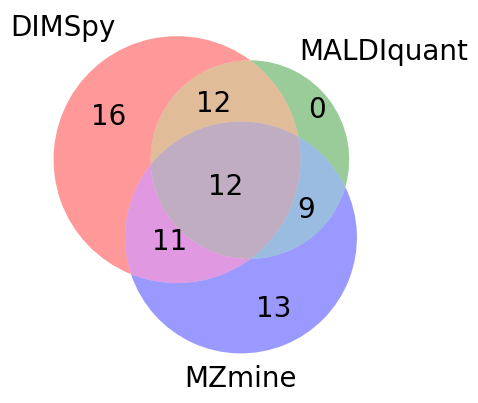

In [28]:
venn_diagram = venn3(subsets = (len(A), len(B),len(AnB),len(C),
                 len(AnC), 
                 len(BnC),len(alpha_beta_gamma)), set_labels = ('DIMSpy', 'MALDIquant', 'MZmine'))

for text in venn_diagram.subset_labels:
    text.set_fontsize(20)  # Adjust font size as needed

for text in venn_diagram.set_labels:
    text.set_fontsize(20)  # Adjust font size as needed

In [29]:
alpha_beta_gamma

{128.010833675158: (128.010833675158, 128.010833675158),
 185.959810956751: (185.959810956751, 185.959810956751),
 215.069668903835: (215.069668903835, 215.069668903835),
 249.155461205689: (249.155461205689, 249.155461205689),
 386.02598199837: (386.02598199837, 386.02598199837),
 408.020594739678: (408.020594739678, 408.020594739678),
 415.15697859489: (415.15697859489, 415.15697859489),
 437.138736369047: (437.138736369047, 437.138736369047),
 456.907262108668: (456.907262108668, 456.907262108668),
 470.014007686009: (470.014007686009, 470.014007686009),
 557.073316457509: (557.073316457509, 557.073316457509),
 472.881155499642: (472.881155499642, 472.881155499642)}

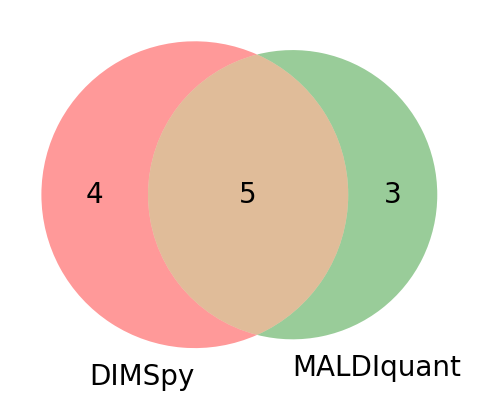

In [30]:
venn_diagram = venn2(subsets= (4,3,5),set_labels=("DIMSpy", "MALDIquant"),)

for text in venn_diagram.subset_labels:
    text.set_fontsize(20)  # Adjust font size as needed

for text in venn_diagram.set_labels:
    text.set_fontsize(20)  # Adjust font size as needed

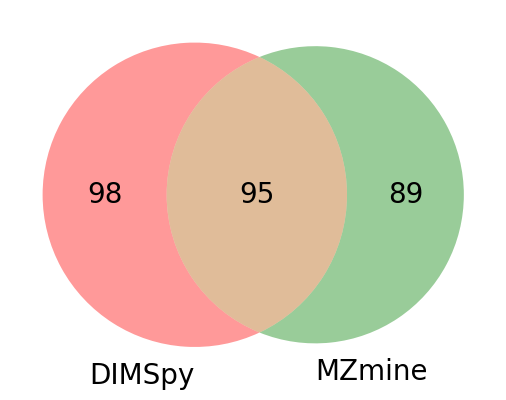

In [31]:
venn_diagram = venn2(subsets= (98,89,95),set_labels=("DIMSpy", "MZmine"),)

for text in venn_diagram.subset_labels:
    text.set_fontsize(20)  # Adjust font size as needed

for text in venn_diagram.set_labels:
    text.set_fontsize(20)  # Adjust font size as needed

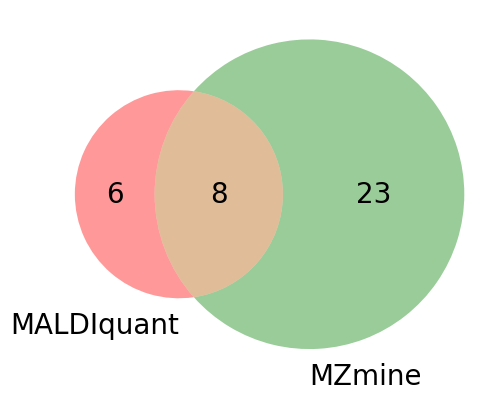

In [32]:
venn_diagram = venn2(subsets= (6,23,8),set_labels=("MALDIquant", "MZmine"),)

for text in venn_diagram.subset_labels:
    text.set_fontsize(20)  # Adjust font size as needed

for text in venn_diagram.set_labels:
    text.set_fontsize(20)  # Adjust font size as needed